In [219]:
import torch
torch.cuda.empty_cache() 

In [220]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [221]:
import pandas as pd
import pyproj

In [222]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [223]:
from pathlib import Path

In [224]:
import joblib

In [225]:
from mt_function_yl import *

In [226]:
import seaborn as sn

In [227]:
from scipy import stats

In [228]:
from tabulate import tabulate

In [229]:
import statsmodels.api as sm

In [230]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn import linear_model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn import svm

import seaborn as sn


# For regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import PredictionErrorDisplay

### Data loading

In [338]:
ttv = pd.read_csv('/home/yelhe/data/Traffic_network_variables/ttvariables_rp_final.csv')

In [339]:
ttv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              995 non-null    int64  
 1   dbusl           995 non-null    float64
 2   dtraml          995 non-null    float64
 3   dtrainl         995 non-null    float64
 4   dplight         995 non-null    float64
 5   dstation        995 non-null    float64
 6   dparkcar        995 non-null    float64
 7   dparktw         995 non-null    float64
 8   dpedcro         995 non-null    float64
 9   dstopsign       995 non-null    float64
 10  dcurb           995 non-null    float64
 11  curbtype        995 non-null    int64  
 12  dgvm            995 non-null    float64
 13  gvm_dwv         995 non-null    int64  
 14  gvm_msp         995 non-null    int64  
 15  gvm_asp         995 non-null    int64  
 16  z_stznr         995 non-null    int64  
 17  z_qnr           995 non-null    int

In [340]:
tt_dist = ttv[['id', 
               'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar',
               'dparktw', 'dpedcro', 'dstopsign', 'dcurb', 'dtrafficarea', 'droad', 
               'droad_sl', 'dvfpath', 'd_bicyclecount', 'd_carcount']]
tt_attr = ttv[['id',
               'gvm_dwv', 'gvm_msp', 'gvm_asp', 'curbtype', 'z_stznr', 'z_qnr',
               'z_knr', 'trafficarea', 'r_width', 'r_surface', 'speedlimit', 
               'bicyclecount', 'carcount']]

In [341]:
c1 = ['dbusl', 'dtraml', 'dtrainl', 'dplight', 
      'dstation', 'dparkcar', 'dparktw', 'dpedcro',
      'dstopsign', 'dcurb', 'dtrafficarea', 'droad', 
      'droad_sl', 'dvfpath', 'd_bicyclecount', 'd_carcount']
c2 = ['gvm_dwv', 'gvm_msp', 'gvm_asp', 'curbtype',
      'z_stznr', 'z_qnr', 'z_knr', 'trafficarea',
      'r_width', 'r_surface', 'speedlimit', 'bicyclecount',
      'carcount']

### Distribution Check

In [342]:
# fig, axes = plt.subplots(ncols=4, nrows=4,
#                          figsize=(3*3, 2*3))
# axes[0,0].hist(tt_dist[c1[0]])
# axes[0,0].set_title(c1[0])
# axes[1,0].hist(tt_dist[c1[1]])
# axes[1,0].set_title(c1[1])
# axes[2,0].hist(tt_dist[c1[2]])
# axes[2,0].set_title(c1[2])
# axes[3,0].hist(tt_dist[c1[3]])
# axes[3,0].set_title(c1[3])
# axes[0,1].hist(tt_dist[c1[4]])
# axes[0,1].set_title(c1[4])
# axes[1,1].hist(tt_dist[c1[5]])
# axes[1,1].set_title(c1[5])
# axes[2,1].hist(tt_dist[c1[6]])
# axes[2,1].set_title(c1[6])
# axes[3,1].hist(tt_dist[c1[7]])
# axes[3,1].set_title(c1[7])
# axes[0,2].hist(tt_dist[c1[8]])
# axes[0,2].set_title(c1[8])
# axes[1,2].hist(tt_dist[c1[9]])
# axes[1,2].set_title(c1[9])
# axes[2,2].hist(tt_dist[c1[10]])
# axes[2,2].set_title(c1[10])
# axes[3,2].hist(tt_dist[c1[11]])
# axes[3,2].set_title(c1[11])
# axes[0,3].hist(tt_dist[c1[12]])
# axes[0,3].set_title(c1[12])
# axes[1,3].hist(tt_dist[c1[13]])
# axes[1,3].set_title(c1[13])


In [343]:
# fig, axes = plt.subplots(ncols=4, nrows=4,
#                          figsize=(3*3, 3*3))
# sm.qqplot(tt_dist[c1[0]], line = '45', ax = axes[0,0])
# axes[0,0].set_title(c1[0])
# sm.qqplot(tt_dist[c1[1]], line = '45', ax = axes[1,0])
# axes[1,0].set_title(c1[1])
# sm.qqplot(tt_dist[c1[2]], line = '45', ax = axes[2,0])
# axes[2,0].set_title(c1[2])
# sm.qqplot(tt_dist[c1[3]], line = '45', ax = axes[3,0])
# axes[3,0].set_title(c1[3])
# sm.qqplot(tt_dist[c1[4]], line = '45', ax = axes[0,1])
# axes[0,1].set_title(c1[4])
# sm.qqplot(tt_dist[c1[5]], line = '45', ax = axes[1,1])
# axes[1,1].set_title(c1[5])
# sm.qqplot(tt_dist[c1[6]], line = '45', ax = axes[2,1])
# axes[2,1].set_title(c1[6])
# sm.qqplot(tt_dist[c1[7]], line = '45', ax = axes[3,1])
# axes[3,1].set_title(c1[7])
# sm.qqplot(tt_dist[c1[8]], line = '45', ax = axes[0,2])
# axes[0,2].set_title(c1[8])
# sm.qqplot(tt_dist[c1[9]], line = '45', ax = axes[1,2])
# axes[1,2].set_title(c1[9])
# sm.qqplot(tt_dist[c1[10]], line = '45', ax = axes[2,2])
# axes[2,2].set_title(c1[10])
# sm.qqplot(tt_dist[c1[11]], line = '45', ax = axes[3,2])
# axes[3,2].set_title(c1[11])
# sm.qqplot(tt_dist[c1[12]], line = '45', ax = axes[0,3])
# axes[0,3].set_title(c1[12])
# sm.qqplot(tt_dist[c1[13]], line = '45', ax = axes[1,3])
# axes[1,3].set_title(c1[13])

# plt.tight_layout()

In [344]:
# res_0 = stats.normaltest(tt_dist[c1[0]])
# res_1 = stats.normaltest(tt_dist[c1[1]])
# res_2 = stats.normaltest(tt_dist[c1[2]])
# res_3 = stats.normaltest(tt_dist[c1[3]])
# res_4 = stats.normaltest(tt_dist[c1[4]])
# res_5 = stats.normaltest(tt_dist[c1[5]])
# res_6 = stats.normaltest(tt_dist[c1[6]])
# res_7 = stats.normaltest(tt_dist[c1[7]])
# res_8 = stats.normaltest(tt_dist[c1[8]])
# res_9 = stats.normaltest(tt_dist[c1[9]])
# res_10 = stats.normaltest(tt_dist[c1[10]])
# res_11 = stats.normaltest(tt_dist[c1[11]])
# res_12 = stats.normaltest(tt_dist[c1[12]])
# res_13 = stats.normaltest(tt_dist[c1[13]])

In [345]:
# print(c1[0], res_0.pvalue, '\n',
#       c1[1], res_1.pvalue, '\n',
#       c1[2], res_2.pvalue, '\n',
#       c1[3], res_3.pvalue, '\n',
#       c1[4], res_4.pvalue, '\n',
#       c1[5], res_5.pvalue, '\n',
#       c1[6], res_6.pvalue, '\n',
#       c1[7], res_7.pvalue, '\n',
#       c1[8], res_8.pvalue, '\n',
#       c1[9], res_9.pvalue, '\n',
#       c1[10], res_10.pvalue, '\n',
#       c1[11], res_11.pvalue, '\n',
#       c1[12], res_12.pvalue, '\n',
#       c1[13], res_13.pvalue, '\n')

### Variables Transformation

In [346]:
# tt_dist_log = tt_dist.copy(deep = True)
# tt_dist_log[c1[0]] = np.log(tt_dist_log[c1[0]]).replace(-np.inf, 0)
# tt_dist_log[c1[1]] = np.log(tt_dist_log[c1[1]]).replace(-np.inf, 0)
# tt_dist_log[c1[2]] = np.log(tt_dist_log[c1[2]]).replace(-np.inf, 0)
# tt_dist_log[c1[3]] = np.log(tt_dist_log[c1[3]]).replace(-np.inf, 0)
# tt_dist_log[c1[4]] = np.log(tt_dist_log[c1[4]]).replace(-np.inf, 0)
# tt_dist_log[c1[5]] = np.log(tt_dist_log[c1[5]]).replace(-np.inf, 0)
# tt_dist_log[c1[6]] = np.log(tt_dist_log[c1[6]]).replace(-np.inf, 0)
# tt_dist_log[c1[7]] = np.log(tt_dist_log[c1[7]]).replace(-np.inf, 0)
# tt_dist_log[c1[8]] = np.log(tt_dist_log[c1[8]]).replace(-np.inf, 0)
# tt_dist_log[c1[9]] = np.log(tt_dist_log[c1[9]]).replace(-np.inf, 0)
# tt_dist_log[c1[10]] = np.log(tt_dist_log[c1[10]]).replace(-np.inf, 0)
# tt_dist_log[c1[11]] = np.log(tt_dist_log[c1[11]]).replace(-np.inf, 0)
# tt_dist_log[c1[12]] = np.log(tt_dist_log[c1[12]]).replace(-np.inf, 0)
# tt_dist_log[c1[13]] = np.log(tt_dist_log[c1[13]]).replace(-np.inf, 0)

In [347]:
# fig, axes = plt.subplots(ncols=4, nrows=4,
#                          figsize=(3*3, 2*3))
# axes[0,0].hist(tt_dist_log[c1[0]])
# axes[0,0].set_title(c1[0])
# axes[1,0].hist(tt_dist_log[c1[1]])
# axes[1,0].set_title(c1[1])
# axes[2,0].hist(tt_dist_log[c1[2]])
# axes[2,0].set_title(c1[2])
# axes[3,0].hist(tt_dist_log[c1[3]])
# axes[3,0].set_title(c1[3])
# axes[0,1].hist(tt_dist_log[c1[4]])
# axes[0,1].set_title(c1[4])
# axes[1,1].hist(tt_dist_log[c1[5]])
# axes[1,1].set_title(c1[5])
# axes[2,1].hist(tt_dist_log[c1[6]])
# axes[2,1].set_title(c1[6])
# axes[3,1].hist(tt_dist_log[c1[7]])
# axes[3,1].set_title(c1[7])
# axes[0,2].hist(tt_dist_log[c1[8]])
# axes[0,2].set_title(c1[8])
# axes[1,2].hist(tt_dist_log[c1[9]])
# axes[1,2].set_title(c1[9])
# axes[2,2].hist(tt_dist_log[c1[10]])
# axes[2,2].set_title(c1[10])
# axes[3,2].hist(tt_dist_log[c1[11]])
# axes[3,2].set_title(c1[11])
# axes[0,3].hist(tt_dist_log[c1[12]])
# axes[0,3].set_title(c1[12])
# axes[1,3].hist(tt_dist_log[c1[13]])
# axes[1,3].set_title(c1[13])


In [348]:
# fig, axes = plt.subplots(ncols=4, nrows=4,
#                          figsize=(3*3, 3*3))
# sm.qqplot(tt_dist_log[c1[0]], line = '45', ax = axes[0,0])
# axes[0,0].set_title(c1[0])
# sm.qqplot(tt_dist_log[c1[1]], line = '45', ax = axes[1,0])
# axes[1,0].set_title(c1[1])
# sm.qqplot(tt_dist_log[c1[2]], line = '45', ax = axes[2,0])
# axes[2,0].set_title(c1[2])
# sm.qqplot(tt_dist_log[c1[3]], line = '45', ax = axes[3,0])
# axes[3,0].set_title(c1[3])
# sm.qqplot(tt_dist_log[c1[4]], line = '45', ax = axes[0,1])
# axes[0,1].set_title(c1[4])
# sm.qqplot(tt_dist_log[c1[5]], line = '45', ax = axes[1,1])
# axes[1,1].set_title(c1[5])
# sm.qqplot(tt_dist_log[c1[6]], line = '45', ax = axes[2,1])
# axes[2,1].set_title(c1[6])
# sm.qqplot(tt_dist_log[c1[7]], line = '45', ax = axes[3,1])
# axes[3,1].set_title(c1[7])
# sm.qqplot(tt_dist_log[c1[8]], line = '45', ax = axes[0,2])
# axes[0,2].set_title(c1[8])
# sm.qqplot(tt_dist_log[c1[9]], line = '45', ax = axes[1,2])
# axes[1,2].set_title(c1[9])
# sm.qqplot(tt_dist_log[c1[10]], line = '45', ax = axes[2,2])
# axes[2,2].set_title(c1[10])
# sm.qqplot(tt_dist_log[c1[11]], line = '45', ax = axes[3,2])
# axes[3,2].set_title(c1[11])
# sm.qqplot(tt_dist_log[c1[12]], line = '45', ax = axes[0,3])
# axes[0,3].set_title(c1[12])
# sm.qqplot(tt_dist_log[c1[13]], line = '45', ax = axes[1,3])
# axes[1,3].set_title(c1[13])
# plt.tight_layout()

In [349]:
# lres_0 = stats.normaltest(tt_dist_log[c1[0]])
# lres_1 = stats.normaltest(tt_dist_log[c1[1]])
# lres_2 = stats.normaltest(tt_dist_log[c1[2]])
# lres_3 = stats.normaltest(tt_dist_log[c1[3]])
# lres_4 = stats.normaltest(tt_dist_log[c1[4]])
# lres_5 = stats.normaltest(tt_dist_log[c1[5]])
# lres_6 = stats.normaltest(tt_dist_log[c1[6]])
# lres_7 = stats.normaltest(tt_dist_log[c1[7]])
# lres_8 = stats.normaltest(tt_dist_log[c1[8]])
# lres_9 = stats.normaltest(tt_dist_log[c1[9]])
# lres_10 = stats.normaltest(tt_dist_log[c1[10]])
# lres_11 = stats.normaltest(tt_dist_log[c1[11]])
# lres_12 = stats.normaltest(tt_dist_log[c1[12]])
# lres_13 = stats.normaltest(tt_dist_log[c1[13]])

In [350]:
# print(c1[0], lres_0.pvalue, '\n',
#       c1[1], lres_1.pvalue, '\n',
#       c1[2], lres_2.pvalue, '\n',
#       c1[3], lres_3.pvalue, '\n',
#       c1[4], lres_4.pvalue, '\n',
#       c1[5], lres_5.pvalue, '\n',
#       c1[6], lres_6.pvalue, '\n',
#       c1[7], lres_7.pvalue, '\n',
#       c1[8], lres_8.pvalue, '\n',
#       c1[9], lres_9.pvalue, '\n',
#       c1[10], lres_10.pvalue, '\n',
#       c1[11], lres_11.pvalue, '\n',
#       c1[12], lres_12.pvalue, '\n',
#       c1[13], lres_13.pvalue, '\n')

In [351]:
# Yeojohnson Transformation

In [352]:
tt_dist.columns

Index(['id', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar',
       'dparktw', 'dpedcro', 'dstopsign', 'dcurb', 'dtrafficarea', 'droad',
       'droad_sl', 'dvfpath', 'd_bicyclecount', 'd_carcount'],
      dtype='object')

In [354]:
tt_dist_yj0 = tt_dist.copy(deep = True)
tt_dist_yj[c1[0]], l0  = stats.yeojohnson(tt_dist_yj0[c1[0]])
tt_dist_yj[c1[1]], l1  = stats.yeojohnson(tt_dist_yj0[c1[1]])
tt_dist_yj[c1[2]], l2  = stats.yeojohnson(tt_dist_yj0[c1[2]])
tt_dist_yj[c1[3]], l3  = stats.yeojohnson(tt_dist_yj0[c1[3]])
tt_dist_yj[c1[4]], l4  = stats.yeojohnson(tt_dist_yj0[c1[4]])
tt_dist_yj[c1[5]], l5  = stats.yeojohnson(tt_dist_yj0[c1[5]])
tt_dist_yj[c1[6]], l6  = stats.yeojohnson(tt_dist_yj0[c1[6]])
tt_dist_yj[c1[7]], l7  = stats.yeojohnson(tt_dist_yj0[c1[7]])
tt_dist_yj[c1[8]], l8  = stats.yeojohnson(tt_dist_yj0[c1[8]])
tt_dist_yj[c1[9]], l9  = stats.yeojohnson(tt_dist_yj0[c1[9]])
tt_dist_yj[c1[10]], l10  = stats.yeojohnson(tt_dist_yj0[c1[10]])
tt_dist_yj[c1[11]], l11  = stats.yeojohnson(tt_dist_yj0[c1[11]])
tt_dist_yj[c1[12]], l12  = stats.yeojohnson(tt_dist_yj0[c1[12]])
tt_dist_yj[c1[13]], l13  = stats.yeojohnson(tt_dist_yj0[c1[13]])
tt_dist_yj[c1[14]], l14  = stats.yeojohnson(tt_dist_yj0[c1[14]])
tt_dist_yj[c1[15]], l15  = stats.yeojohnson(tt_dist_yj0[c1[15]])

Text(0.5, 1.0, 'd_carcount')

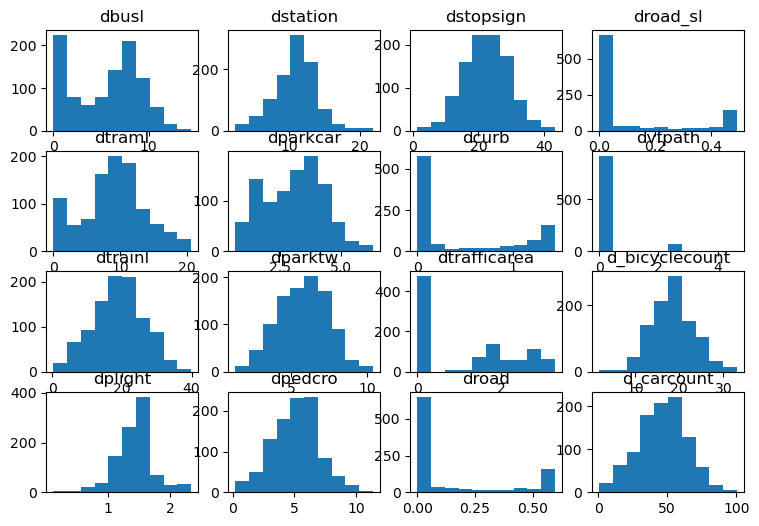

In [355]:
fig, axes = plt.subplots(ncols=4, nrows=4,
                         figsize=(3*3, 2*3))
axes[0,0].hist(tt_dist_yj[c1[0]])
axes[0,0].set_title(c1[0])
axes[1,0].hist(tt_dist_yj[c1[1]])
axes[1,0].set_title(c1[1])
axes[2,0].hist(tt_dist_yj[c1[2]])
axes[2,0].set_title(c1[2])
axes[3,0].hist(tt_dist_yj[c1[3]])
axes[3,0].set_title(c1[3])
axes[0,1].hist(tt_dist_yj[c1[4]])
axes[0,1].set_title(c1[4])
axes[1,1].hist(tt_dist_yj[c1[5]])
axes[1,1].set_title(c1[5])
axes[2,1].hist(tt_dist_yj[c1[6]])
axes[2,1].set_title(c1[6])
axes[3,1].hist(tt_dist_yj[c1[7]])
axes[3,1].set_title(c1[7])
axes[0,2].hist(tt_dist_yj[c1[8]])
axes[0,2].set_title(c1[8])
axes[1,2].hist(tt_dist_yj[c1[9]])
axes[1,2].set_title(c1[9])
axes[2,2].hist(tt_dist_yj[c1[10]])
axes[2,2].set_title(c1[10])
axes[3,2].hist(tt_dist_yj[c1[11]])
axes[3,2].set_title(c1[11])
axes[0,3].hist(tt_dist_yj[c1[12]])
axes[0,3].set_title(c1[12])
axes[1,3].hist(tt_dist_yj[c1[13]])
axes[1,3].set_title(c1[13])
axes[2,3].hist(tt_dist_yj[c1[14]])
axes[2,3].set_title(c1[14])
axes[3,3].hist(tt_dist_yj[c1[15]])
axes[3,3].set_title(c1[15])

In [308]:
# fig, axes = plt.subplots(ncols=4, nrows=4,
#                          figsize=(3*3, 3*3))
# sm.qqplot(tt_dist_yj[c1[0]], line = '45', ax = axes[0,0])
# axes[0,0].set_title(c1[0])
# sm.qqplot(tt_dist_yj[c1[1]], line = '45', ax = axes[1,0])
# axes[1,0].set_title(c1[1])
# sm.qqplot(tt_dist_yj[c1[2]], line = '45', ax = axes[2,0])
# axes[2,0].set_title(c1[2])
# sm.qqplot(tt_dist_yj[c1[3]], line = '45', ax = axes[3,0])
# axes[3,0].set_title(c1[3])
# sm.qqplot(tt_dist_yj[c1[4]], line = '45', ax = axes[0,1])
# axes[0,1].set_title(c1[4])
# sm.qqplot(tt_dist_yj[c1[5]], line = '45', ax = axes[1,1])
# axes[1,1].set_title(c1[5])
# sm.qqplot(tt_dist_yj[c1[6]], line = '45', ax = axes[2,1])
# axes[2,1].set_title(c1[6])
# sm.qqplot(tt_dist_yj[c1[7]], line = '45', ax = axes[3,1])
# axes[3,1].set_title(c1[7])
# sm.qqplot(tt_dist_yj[c1[8]], line = '45', ax = axes[0,2])
# axes[0,2].set_title(c1[8])
# sm.qqplot(tt_dist_yj[c1[9]], line = '45', ax = axes[1,2])
# axes[1,2].set_title(c1[9])
# sm.qqplot(tt_dist_yj[c1[10]], line = '45', ax = axes[2,2])
# axes[2,2].set_title(c1[10])
# sm.qqplot(tt_dist_yj[c1[11]], line = '45', ax = axes[3,2])
# axes[3,2].set_title(c1[11])
# sm.qqplot(tt_dist_yj[c1[12]], line = '45', ax = axes[0,3])
# axes[0,3].set_title(c1[12])
# sm.qqplot(tt_dist_yj[c1[13]], line = '45', ax = axes[1,3])
# axes[1,3].set_title(c1[13])
# plt.tight_layout()

In [309]:
# yjres_0 = stats.normaltest(tt_dist_yj[c1[0]])
# yjres_1 = stats.normaltest(tt_dist_yj[c1[1]])
# yjres_2 = stats.normaltest(tt_dist_yj[c1[2]])
# yjres_3 = stats.normaltest(tt_dist_yj[c1[3]])
# yjres_4 = stats.normaltest(tt_dist_yj[c1[4]])
# yjres_5 = stats.normaltest(tt_dist_yj[c1[5]])
# yjres_6 = stats.normaltest(tt_dist_yj[c1[6]])
# yjres_7 = stats.normaltest(tt_dist_yj[c1[7]])
# yjres_8 = stats.normaltest(tt_dist_yj[c1[8]])
# yjres_9 = stats.normaltest(tt_dist_yj[c1[9]])
# yjres_10 = stats.normaltest(tt_dist_yj[c1[10]])
# yjres_11 = stats.normaltest(tt_dist_yj[c1[11]])
# yjres_12 = stats.normaltest(tt_dist_yj[c1[12]])
# yjres_13 = stats.normaltest(tt_dist_yj[c1[13]])

In [310]:
# print(c1[0], yjres_0.pvalue, '\n',
#       c1[1], yjres_1.pvalue, '\n',
#       c1[2], yjres_2.pvalue, '\n',
#       c1[3], yjres_3.pvalue, '\n',
#       c1[4], yjres_4.pvalue, '\n',
#       c1[5], yjres_5.pvalue, '\n',
#       c1[6], yjres_6.pvalue, '\n',
#       c1[7], yjres_7.pvalue, '\n',
#       c1[8], yjres_8.pvalue, '\n',
#       c1[9], yjres_9.pvalue, '\n',
#       c1[10], yjres_10.pvalue, '\n',
#       c1[11], yjres_11.pvalue, '\n',
#       c1[12], yjres_12.pvalue, '\n',
#       c1[13], yjres_13.pvalue, '\n')

### Variables Standardization

In [356]:
from sklearn.preprocessing import StandardScaler

In [358]:
tt_dist_st = tt_dist_yj.copy(deep = True)

In [359]:
tt_dist_st.columns

Index(['id', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar',
       'dparktw', 'dpedcro', 'dstopsign', 'dcurb', 'dtrafficarea', 'droad',
       'droad_sl', 'dvfpath', 'd_bicyclecount', 'd_carcount'],
      dtype='object')

In [360]:
tt_dist_st[c1[0]]  = stats.zscore(tt_dist_st[c1[0]])
tt_dist_st[c1[1]]  = stats.zscore(tt_dist_st[c1[1]])
tt_dist_st[c1[2]]  = stats.zscore(tt_dist_st[c1[2]])
tt_dist_st[c1[3]]  = stats.zscore(tt_dist_st[c1[3]])
tt_dist_st[c1[4]]  = stats.zscore(tt_dist_st[c1[4]])
tt_dist_st[c1[5]]  = stats.zscore(tt_dist_st[c1[5]])
tt_dist_st[c1[6]]  = stats.zscore(tt_dist_st[c1[6]])
tt_dist_st[c1[7]]  = stats.zscore(tt_dist_st[c1[7]])
tt_dist_st[c1[8]]  = stats.zscore(tt_dist_st[c1[8]])
tt_dist_st[c1[9]]  = stats.zscore(tt_dist_st[c1[9]])
tt_dist_st[c1[10]]  = stats.zscore(tt_dist_st[c1[10]])
tt_dist_st[c1[11]]  = stats.zscore(tt_dist_st[c1[11]])
tt_dist_st[c1[12]]  = stats.zscore(tt_dist_st[c1[12]])
tt_dist_st[c1[13]]  = stats.zscore(tt_dist_st[c1[13]])
tt_dist_st[c1[14]]  = stats.zscore(tt_dist_st[c1[14]])
tt_dist_st[c1[15]]  = stats.zscore(tt_dist_st[c1[15]])

Text(0.5, 1.0, 'd_carcount')

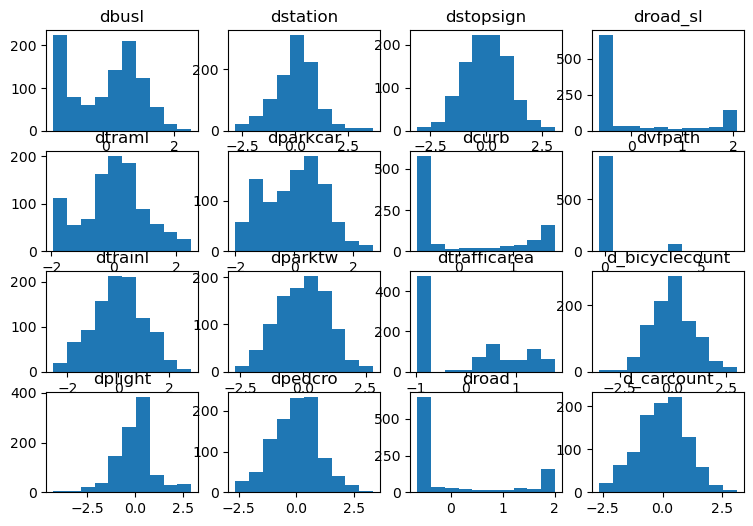

In [361]:
fig, axes = plt.subplots(ncols=4, nrows=4,
                         figsize=(3*3, 2*3))
axes[0,0].hist(tt_dist_st[c1[0]])
axes[0,0].set_title(c1[0])
axes[1,0].hist(tt_dist_st[c1[1]])
axes[1,0].set_title(c1[1])
axes[2,0].hist(tt_dist_st[c1[2]])
axes[2,0].set_title(c1[2])
axes[3,0].hist(tt_dist_st[c1[3]])
axes[3,0].set_title(c1[3])
axes[0,1].hist(tt_dist_st[c1[4]])
axes[0,1].set_title(c1[4])
axes[1,1].hist(tt_dist_st[c1[5]])
axes[1,1].set_title(c1[5])
axes[2,1].hist(tt_dist_st[c1[6]])
axes[2,1].set_title(c1[6])
axes[3,1].hist(tt_dist_st[c1[7]])
axes[3,1].set_title(c1[7])
axes[0,2].hist(tt_dist_st[c1[8]])
axes[0,2].set_title(c1[8])
axes[1,2].hist(tt_dist_st[c1[9]])
axes[1,2].set_title(c1[9])
axes[2,2].hist(tt_dist_st[c1[10]])
axes[2,2].set_title(c1[10])
axes[3,2].hist(tt_dist_st[c1[11]])
axes[3,2].set_title(c1[11])
axes[0,3].hist(tt_dist_st[c1[12]])
axes[0,3].set_title(c1[12])
axes[1,3].hist(tt_dist_st[c1[13]])
axes[1,3].set_title(c1[13])
axes[2,3].hist(tt_dist_st[c1[14]])
axes[2,3].set_title(c1[14])
axes[3,3].hist(tt_dist_st[c1[15]])
axes[3,3].set_title(c1[15])

In [363]:
# fig, axes = plt.subplots(ncols=4, nrows=4,
#                          figsize=(3*3, 3*3))
# sm.qqplot(tt_dist_st[c1[0]], line = '45', ax = axes[0,0])
# axes[0,0].set_title(c1[0])
# sm.qqplot(tt_dist_st[c1[1]], line = '45', ax = axes[1,0])
# axes[1,0].set_title(c1[1])
# sm.qqplot(tt_dist_st[c1[2]], line = '45', ax = axes[2,0])
# axes[2,0].set_title(c1[2])
# sm.qqplot(tt_dist_st[c1[3]], line = '45', ax = axes[3,0])
# axes[3,0].set_title(c1[3])
# sm.qqplot(tt_dist_st[c1[4]], line = '45', ax = axes[0,1])
# axes[0,1].set_title(c1[4])
# sm.qqplot(tt_dist_st[c1[5]], line = '45', ax = axes[1,1])
# axes[1,1].set_title(c1[5])
# sm.qqplot(tt_dist_st[c1[6]], line = '45', ax = axes[2,1])
# axes[2,1].set_title(c1[6])
# sm.qqplot(tt_dist_st[c1[7]], line = '45', ax = axes[3,1])
# axes[3,1].set_title(c1[7])
# sm.qqplot(tt_dist_st[c1[8]], line = '45', ax = axes[0,2])
# axes[0,2].set_title(c1[8])
# sm.qqplot(tt_dist_st[c1[9]], line = '45', ax = axes[1,2])
# axes[1,2].set_title(c1[9])
# sm.qqplot(tt_dist_st[c1[10]], line = '45', ax = axes[2,2])
# axes[2,2].set_title(c1[10])
# sm.qqplot(tt_dist_st[c1[11]], line = '45', ax = axes[3,2])
# axes[3,2].set_title(c1[11])
# sm.qqplot(tt_dist_st[c1[12]], line = '45', ax = axes[0,3])
# axes[0,3].set_title(c1[12])
# sm.qqplot(tt_dist_st[c1[13]], line = '45', ax = axes[1,3])
# axes[1,3].set_title(c1[13])
# plt.tight_layout()

In [364]:
# stres_0 = stats.normaltest(tt_dist_st[c1[0]])
# stres_1 = stats.normaltest(tt_dist_st[c1[1]])
# stres_2 = stats.normaltest(tt_dist_st[c1[2]])
# stres_3 = stats.normaltest(tt_dist_st[c1[3]])
# stres_4 = stats.normaltest(tt_dist_st[c1[4]])
# stres_5 = stats.normaltest(tt_dist_st[c1[5]])
# stres_6 = stats.normaltest(tt_dist_st[c1[6]])
# stres_7 = stats.normaltest(tt_dist_st[c1[7]])
# stres_8 = stats.normaltest(tt_dist_st[c1[8]])
# stres_9 = stats.normaltest(tt_dist_st[c1[9]])
# stres_10 = stats.normaltest(tt_dist_st[c1[10]])
# stres_11 = stats.normaltest(tt_dist_st[c1[11]])
# stres_12 = stats.normaltest(tt_dist_st[c1[12]])
# stres_13 = stats.normaltest(tt_dist_st[c1[13]])

In [365]:
# print(c1[0], stres_0.pvalue, '\n',
#       c1[1], stres_1.pvalue, '\n',
#       c1[2], stres_2.pvalue, '\n',
#       c1[3], stres_3.pvalue, '\n',
#       c1[4], stres_4.pvalue, '\n',
#       c1[5], stres_5.pvalue, '\n',
#       c1[6], stres_6.pvalue, '\n',
#       c1[7], stres_7.pvalue, '\n',
#       c1[8], stres_8.pvalue, '\n',
#       c1[9], stres_9.pvalue, '\n',
#       c1[10], stres_10.pvalue, '\n',
#       c1[11], stres_11.pvalue, '\n',
#       c1[12], stres_12.pvalue, '\n',
#       c1[13], stres_13.pvalue, '\n')

In [366]:
tt_dist_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              995 non-null    int64  
 1   dbusl           995 non-null    float64
 2   dtraml          995 non-null    float64
 3   dtrainl         995 non-null    float64
 4   dplight         995 non-null    float64
 5   dstation        995 non-null    float64
 6   dparkcar        995 non-null    float64
 7   dparktw         995 non-null    float64
 8   dpedcro         995 non-null    float64
 9   dstopsign       995 non-null    float64
 10  dcurb           995 non-null    float64
 11  dtrafficarea    995 non-null    float64
 12  droad           995 non-null    float64
 13  droad_sl        995 non-null    float64
 14  dvfpath         995 non-null    float64
 15  d_bicyclecount  995 non-null    float64
 16  d_carcount      995 non-null    float64
dtypes: float64(16), int64(1)
memory usa

In [367]:
# # Distance variables after normalization and standardization
# tt_dist_st.to_csv('/home/yelhe/data/Traffic_network_variables/ttvariables_rp_distance_norm_stand_final.csv', index = False)

In [379]:
# Value & categories
tt_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            995 non-null    int64  
 1   gvm_dwv       995 non-null    int64  
 2   gvm_msp       995 non-null    int64  
 3   gvm_asp       995 non-null    int64  
 4   curbtype      995 non-null    int64  
 5   z_stznr       995 non-null    int64  
 6   z_qnr         995 non-null    int64  
 7   z_knr         995 non-null    int64  
 8   trafficarea   995 non-null    object 
 9   r_width       995 non-null    int64  
 10  r_surface     995 non-null    object 
 11  speedlimit    995 non-null    int64  
 12  bicyclecount  995 non-null    float64
 13  carcount      995 non-null    float64
dtypes: float64(2), int64(10), object(2)
memory usage: 109.0+ KB


In [380]:
# Values 
print(len(tt_attr['gvm_dwv'].unique()), len(tt_attr['gvm_msp'].unique()), len(tt_attr['gvm_dwv'].unique()),
      len(tt_attr['bicyclecount'].unique()), len(tt_attr['carcount'].unique()))

210 167 210 43 155


In [381]:
tt_attrv = tt_attr.copy(deep = True)

In [382]:
tt_attrv = tt_attrv[['id', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 
                     'bicyclecount', 'carcount', 'r_width', 'speedlimit']]

In [383]:
tt_attrv.columns

Index(['id', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'bicyclecount', 'carcount',
       'r_width', 'speedlimit'],
      dtype='object')

In [384]:
tt_attrv1 = tt_attrv[~tt_attrv.isnull().any(axis = 1)]

In [385]:
c3 = ['gvm_dwv', 'gvm_msp', 'gvm_asp', 'bicyclecount', 
      'carcount', 'r_width', 'speedlimit']

In [386]:
# fig, axes = plt.subplots(ncols=4, nrows=2,
#                          figsize=(3*3, 2*3))
# axes[0,0].hist(tt_attrv1[c3[0]])
# axes[0,0].set_title(c3[0])
# axes[1,0].hist(tt_attrv1[c3[1]])
# axes[1,0].set_title(c3[1])
# axes[0,1].hist(tt_attrv1[c3[2]])
# axes[0,1].set_title(c3[2])
# axes[1,1].hist(tt_attrv1[c3[3]])
# axes[1,1].set_title(c3[3])
# axes[0,2].hist(tt_attrv1[c3[4]])
# axes[0,2].set_title(c3[4])
# axes[1,2].hist(tt_attrv1[c3[5]])
# axes[1,2].set_title(c3[5])
# axes[0,3].hist(tt_attrv1[c3[6]])
# axes[0,3].set_title(c3[6])

In [387]:
# fig, axes = plt.subplots(ncols=4, nrows=2,
#                          figsize=(3*3, 3*3))
# sm.qqplot(tt_attrv1[c3[0]], line = '45', ax = axes[0,0])
# axes[0,0].set_title(c3[0])
# sm.qqplot(tt_attrv1[c3[1]], line = '45', ax = axes[1,0])
# axes[1,0].set_title(c3[1])
# sm.qqplot(tt_attrv1[c3[2]], line = '45', ax = axes[0,1])
# axes[0,1].set_title(c3[2])
# sm.qqplot(tt_attrv1[c3[3]], line = '45', ax = axes[1,1])
# axes[1,1].set_title(c3[3])
# sm.qqplot(tt_attrv1[c3[4]], line = '45', ax = axes[0,2])
# axes[0,2].set_title(c3[4])
# sm.qqplot(tt_attrv1[c3[5]], line = '45', ax = axes[1,2])
# axes[1,2].set_title(c3[5])
# sm.qqplot(tt_attrv1[c3[6]], line = '45', ax = axes[1,3])
# axes[0,3].set_title(c3[6])

In [388]:
# Transformation
attrv1 = tt_attrv1.copy(deep = True)
attrv1[c3[0]], a1 = stats.yeojohnson(attrv1[c3[0]])
attrv1[c3[1]], a2 = stats.yeojohnson(attrv1[c3[1]])
attrv1[c3[2]], a3 = stats.yeojohnson(attrv1[c3[2]])
attrv1[c3[3]], a4 = stats.yeojohnson(attrv1[c3[3]])
attrv1[c3[4]], a5 = stats.yeojohnson(attrv1[c3[4]])
attrv1[c3[5]], a6 = stats.yeojohnson(attrv1[c3[5]])
attrv1[c3[6]], a7 = stats.yeojohnson(attrv1[c3[6]])

Text(0.5, 1.0, 'speedlimit')

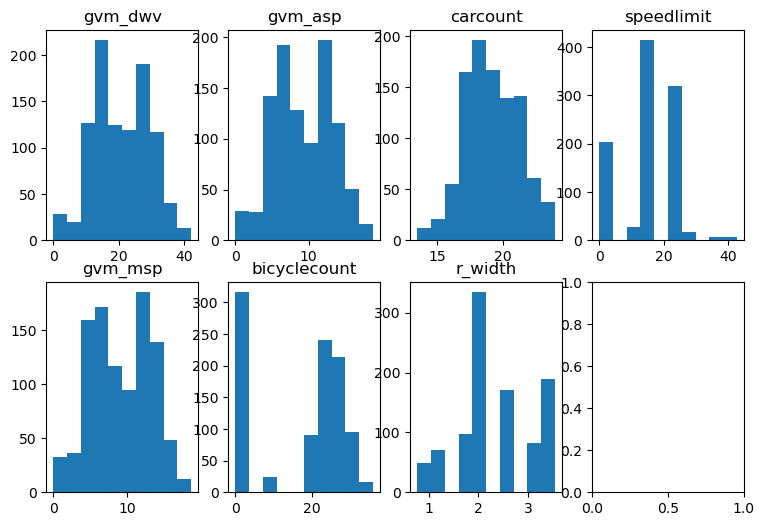

In [391]:
fig, axes = plt.subplots(ncols=4, nrows=2,
                         figsize=(3*3, 2*3))
axes[0,0].hist(attrv1[c3[0]])
axes[0,0].set_title(c3[0])
axes[1,0].hist(attrv1[c3[1]])
axes[1,0].set_title(c3[1])
axes[0,1].hist(attrv1[c3[2]])
axes[0,1].set_title(c3[2])
axes[1,1].hist(attrv1[c3[3]])
axes[1,1].set_title(c3[3])
axes[0,2].hist(attrv1[c3[4]])
axes[0,2].set_title(c3[4])
axes[1,2].hist(attrv1[c3[5]])
axes[1,2].set_title(c3[5])
axes[0,3].hist(attrv1[c3[6]])
axes[0,3].set_title(c3[6])

In [392]:
# Standardization
attrv1[c3[0]] = stats.zscore(attrv1[c3[0]])
attrv1[c3[1]] = stats.zscore(attrv1[c3[1]])
attrv1[c3[2]] = stats.zscore(attrv1[c3[2]])
attrv1[c3[3]] = stats.zscore(attrv1[c3[3]])
attrv1[c3[4]] = stats.zscore(attrv1[c3[4]])
attrv1[c3[5]] = stats.zscore(attrv1[c3[5]])
attrv1[c3[6]] = stats.zscore(attrv1[c3[6]])

Text(0.5, 1.0, 'speedlimit')

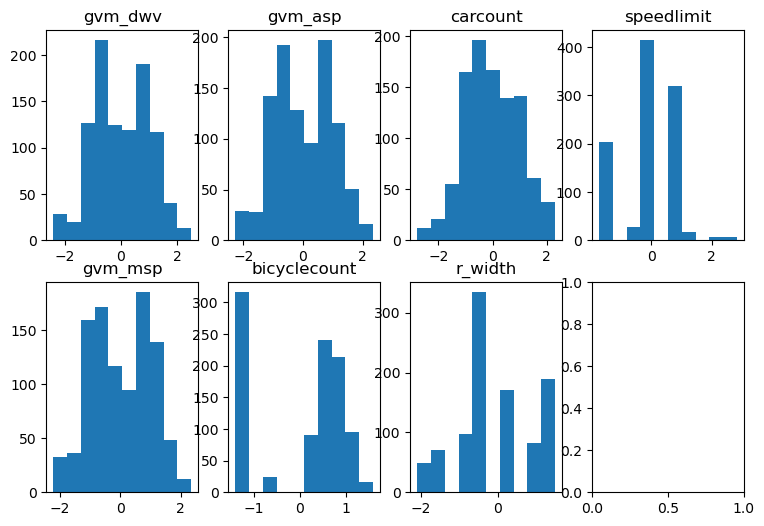

In [393]:
fig, axes = plt.subplots(ncols=4, nrows=2,
                         figsize=(3*3, 2*3))
axes[0,0].hist(attrv1[c3[0]])
axes[0,0].set_title(c3[0])
axes[1,0].hist(attrv1[c3[1]])
axes[1,0].set_title(c3[1])
axes[0,1].hist(attrv1[c3[2]])
axes[0,1].set_title(c3[2])
axes[1,1].hist(attrv1[c3[3]])
axes[1,1].set_title(c3[3])
axes[0,2].hist(attrv1[c3[4]])
axes[0,2].set_title(c3[4])
axes[1,2].hist(attrv1[c3[5]])
axes[1,2].set_title(c3[5])
axes[0,3].hist(attrv1[c3[6]])
axes[0,3].set_title(c3[6])

Text(0.5, 1.0, 'speedlimit')

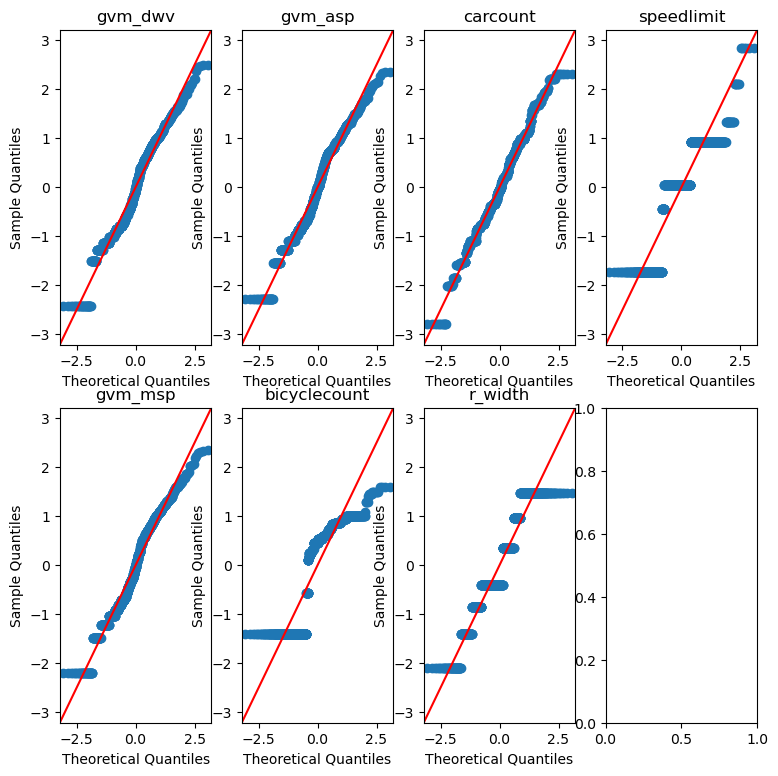

In [394]:
fig, axes = plt.subplots(ncols=4, nrows=2,
                         figsize=(3*3, 3*3))
sm.qqplot(attrv1[c3[0]], line = '45', ax = axes[0,0])
axes[0,0].set_title(c3[0])
sm.qqplot(attrv1[c3[1]], line = '45', ax = axes[1,0])
axes[1,0].set_title(c3[1])
sm.qqplot(attrv1[c3[2]], line = '45', ax = axes[0,1])
axes[0,1].set_title(c3[2])
sm.qqplot(attrv1[c3[3]], line = '45', ax = axes[1,1])
axes[1,1].set_title(c3[3])
sm.qqplot(attrv1[c3[4]], line = '45', ax = axes[0,2])
axes[0,2].set_title(c3[4])
sm.qqplot(attrv1[c3[5]], line = '45', ax = axes[1,2])
axes[1,2].set_title(c3[5])
sm.qqplot(attrv1[c3[6]], line = '45', ax = axes[0,3])
axes[0,3].set_title(c3[6])

In [198]:
# #with bicyclecount & carcount
# acc_attrv1.to_csv('/home/yelhe/data/Traffic_network_variables/ttvariables_value_norm_stand_final.csv', index = False)

In [397]:
# not considering partial count of bicycle / car
tt_attrv2 = tt_attrv.copy(deep = True)

In [398]:
tt_attrv2 = tt_attrv2.drop(['bicyclecount', 'carcount'], axis = 1)

In [399]:
tt_attrv2.columns

Index(['id', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width', 'speedlimit'], dtype='object')

In [400]:
c4 = ['gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width', 'speedlimit']

In [401]:
# Transformation
attrv2 = tt_attrv2.copy(deep = True)
attrv2[c4[0]], a1 = stats.yeojohnson(attrv2[c4[0]])
attrv2[c4[1]], a2 = stats.yeojohnson(attrv2[c4[1]])
attrv2[c4[2]], a3 = stats.yeojohnson(attrv2[c4[2]])
attrv2[c4[3]], a4 = stats.yeojohnson(attrv2[c4[3]])
attrv2[c4[4]], a5 = stats.yeojohnson(attrv2[c4[4]])

In [402]:
# Standardization
attrv2[c4[0]] = stats.zscore(attrv2[c4[0]])
attrv2[c4[1]] = stats.zscore(attrv2[c4[1]])
attrv2[c4[2]] = stats.zscore(attrv2[c4[2]])
attrv2[c4[3]] = stats.zscore(attrv2[c4[3]])
attrv2[c4[4]] = stats.zscore(attrv2[c4[4]])

In [403]:
# fig, axes = plt.subplots(ncols=3, nrows=2,
#                          figsize=(3*3, 2*3))
# axes[0,0].hist(attrv1[c4[0]])
# axes[0,0].set_title(c4[0])
# axes[1,0].hist(attrv1[c4[1]])
# axes[1,0].set_title(c4[1])
# axes[0,1].hist(attrv1[c4[2]])
# axes[0,1].set_title(c4[2])
# axes[1,1].hist(attrv1[c4[3]])
# axes[1,1].set_title(c4[3])
# axes[0,2].hist(attrv1[c4[4]])
# axes[0,2].set_title(c4[4])

In [404]:
# fig, axes = plt.subplots(ncols=3, nrows=2,
#                          figsize=(3*3, 3*3))
# sm.qqplot(attrv2[c4[0]], line = '45', ax = axes[0,0])
# axes[0,0].set_title(c4[0])
# sm.qqplot(attrv2[c4[1]], line = '45', ax = axes[1,0])
# axes[1,0].set_title(c4[1])
# sm.qqplot(attrv2[c4[2]], line = '45', ax = axes[0,1])
# axes[0,1].set_title(c4[2])
# sm.qqplot(attrv2[c4[3]], line = '45', ax = axes[1,1])
# axes[1,1].set_title(c4[3])
# sm.qqplot(attrv2[c4[4]], line = '45', ax = axes[0,2])
# axes[0,2].set_title(c4[4])


In [405]:
# attrv2.to_csv('/home/yelhe/data/Traffic_network_variables/ttvariables_value_norm_stand.csv', index = False)

#### Categorical variables

In [406]:
import category_encoders as ce

In [407]:
# Categorical
print(len(tt_attr['z_stznr'].unique()), len(tt_attr['z_qnr'].unique()), len(tt_attr['z_knr'].unique()),
      len(tt_attr['trafficarea'].unique()), len(tt_attr['r_width'].unique()), len(tt_attr['r_surface'].unique()), 
      len(tt_attr['speedlimit'].unique()), len(tt_attr['curbtype'].unique()))

209 34 12 3 7 2 7 2


In [410]:
tt_attr['curbtype'].unique()

array([25, 15])

In [411]:
tt_attr.columns

Index(['id', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'curbtype', 'z_stznr', 'z_qnr',
       'z_knr', 'trafficarea', 'r_width', 'r_surface', 'speedlimit',
       'bicyclecount', 'carcount'],
      dtype='object')

In [412]:
tt_attrc = tt_attr.copy(deep = True)
tt_attrc = tt_attrc[['id','curbtype','z_stznr','z_qnr','z_knr','trafficarea',
                     'r_width','r_surface','speedlimit']]

In [413]:
tt_attrc.columns

Index(['id', 'curbtype', 'z_stznr', 'z_qnr', 'z_knr', 'trafficarea', 'r_width',
       'r_surface', 'speedlimit'],
      dtype='object')

In [414]:
tt_attrc['trafficarea'].unique()

array(['T30', 'T20', 'T0'], dtype=object)

In [415]:
tt_attrc = tt_attrc.drop(['z_stznr'], axis = 1)

In [416]:
oh = ce.OneHotEncoder(cols = ['curbtype','z_qnr','z_knr','trafficarea',
                                    'r_width','r_surface','speedlimit'])
attrc_oh = oh.fit_transform(tt_attrc)

In [417]:
attrc_oh.columns

Index(['id', 'curbtype_1', 'curbtype_2', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3',
       'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9',
       'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15',
       'z_qnr_16', 'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21',
       'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27',
       'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33',
       'z_qnr_34', 'z_knr_1', 'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5',
       'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9', 'z_knr_10', 'z_knr_11',
       'z_knr_12', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3',
       'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5',
       'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1',
       'speedlimit_2', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5',
       'speedlimit_6', 'speedlimit_7'],
      dtype='object')

In [418]:
tt_attrc_oh = tt_attrc.merge(attrc_oh, on = ['id'])

In [419]:
# All points with categorical data
# tt_attrc_oh.to_csv('/home/yelhe/data/Traffic_network_variables/ttvariables_categorical.csv', index = False)

In [420]:
tt_attrc_oh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             995 non-null    int64 
 1   curbtype       995 non-null    int64 
 2   z_qnr          995 non-null    int64 
 3   z_knr          995 non-null    int64 
 4   trafficarea    995 non-null    object
 5   r_width        995 non-null    int64 
 6   r_surface      995 non-null    object
 7   speedlimit     995 non-null    int64 
 8   curbtype_1     995 non-null    int64 
 9   curbtype_2     995 non-null    int64 
 10  z_qnr_1        995 non-null    int64 
 11  z_qnr_2        995 non-null    int64 
 12  z_qnr_3        995 non-null    int64 
 13  z_qnr_4        995 non-null    int64 
 14  z_qnr_5        995 non-null    int64 
 15  z_qnr_6        995 non-null    int64 
 16  z_qnr_7        995 non-null    int64 
 17  z_qnr_8        995 non-null    int64 
 18  z_qnr_9        995 non-null   

In [421]:
tt_dist_st

,id,dbusl,dtraml,dtrainl,dplight,dstation,dparkcar,dparktw,dpedcro,dstopsign,dcurb,dtrafficarea,droad,droad_sl,dvfpath,d_bicyclecount,d_carcount
0,0,0.533307,0.234998,-0.942784,0.368033,-0.338682,-0.753528,-0.235239,0.399750,0.124495,-0.761710,-0.977304,-0.638466,-0.622514,-0.280192,-0.087370,0.846085
1,1,-0.119043,0.403879,0.407263,-0.066734,-1.392289,0.250676,0.003987,-0.213828,-1.193288,1.570392,1.155005,1.998772,2.069438,-0.280192,0.602345,0.809218
2,2,-1.359782,0.308782,0.426493,0.373822,-0.080771,0.550927,0.741068,0.767492,-1.181795,-0.761402,0.523856,-0.637635,-0.621397,-0.280192,0.410674,0.572785
3,3,-1.063223,-0.879155,-1.311050,-0.263934,-0.100307,0.812164,0.035551,-1.581991,0.075559,-0.757788,0.495516,-0.638946,-0.623035,-0.280192,1.115502,-0.533344
4,4,-1.128829,0.610985,-0.509752,0.125982,0.196984,0.059786,1.905565,0.747465,0.919871,0.116717,-0.977304,-0.500954,-0.453974,-0.280192,0.231021,2.046426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,990,-0.925660,-1.628441,-1.632431,-0.021946,-2.198568,0.609004,-0.863880,-1.343455,-1.047874,-0.625660,0.762107,-0.565424,-0.532575,-0.280192,-1.177238,-1.651058
991,991,-1.271416,-1.936622,-1.194329,-0.110180,0.380956,-0.375359,-0.639604,-0.758515,-0.207444,-0.762091,0.562125,-0.639142,-0.623284,-0.280192,-0.509256,-1.921410
992,992,-1.360452,-1.849233,-0.088335,0.731553,-1.535603,-1.124832,-1.800711,0.548884,-0.091750,-0.760316,0.576492,-0.590773,-0.563837,-0.280192,-0.916710,-1.402257
993,993,-0.771386,-1.360861,0.031903,-4.136232,-2.232247,-0.865692,-0.398089,1.156709,-0.357271,1.299746,0.682796,-0.638717,-0.622902,-0.280192,-1.541722,-0.513627


In [422]:
attrv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            995 non-null    int64  
 1   gvm_dwv       995 non-null    float64
 2   gvm_msp       995 non-null    float64
 3   gvm_asp       995 non-null    float64
 4   bicyclecount  995 non-null    float64
 5   carcount      995 non-null    float64
 6   r_width       995 non-null    float64
 7   speedlimit    995 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 62.3 KB


In [423]:
attrv1 = attrv1.rename(columns = {'r_width': 'r_width_value',
                                  'speedlimit': 'speedlimit_value'})

In [424]:
ttall = tt_dist_st.merge(attrv1, on = ['id'])

In [425]:
ttall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                995 non-null    int64  
 1   dbusl             995 non-null    float64
 2   dtraml            995 non-null    float64
 3   dtrainl           995 non-null    float64
 4   dplight           995 non-null    float64
 5   dstation          995 non-null    float64
 6   dparkcar          995 non-null    float64
 7   dparktw           995 non-null    float64
 8   dpedcro           995 non-null    float64
 9   dstopsign         995 non-null    float64
 10  dcurb             995 non-null    float64
 11  dtrafficarea      995 non-null    float64
 12  droad             995 non-null    float64
 13  droad_sl          995 non-null    float64
 14  dvfpath           995 non-null    float64
 15  d_bicyclecount    995 non-null    float64
 16  d_carcount        995 non-null    float64
 1

In [426]:
ttall = ttall.merge(tt_attrc_oh, on = ['id'])

In [427]:
ttall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 98 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                995 non-null    int64  
 1   dbusl             995 non-null    float64
 2   dtraml            995 non-null    float64
 3   dtrainl           995 non-null    float64
 4   dplight           995 non-null    float64
 5   dstation          995 non-null    float64
 6   dparkcar          995 non-null    float64
 7   dparktw           995 non-null    float64
 8   dpedcro           995 non-null    float64
 9   dstopsign         995 non-null    float64
 10  dcurb             995 non-null    float64
 11  dtrafficarea      995 non-null    float64
 12  droad             995 non-null    float64
 13  droad_sl          995 non-null    float64
 14  dvfpath           995 non-null    float64
 15  d_bicyclecount    995 non-null    float64
 16  d_carcount        995 non-null    float64
 1

In [428]:
# # ALL including distance variables after normalization and standardization, 
# # value variables after normalization and standardization, and categorical variables
ttall.to_csv('/home/yelhe/data/Traffic_network_variables/ttvariables_rp_all_final.csv', index = False)

In [429]:
ttall.columns

Index(['id', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar',
       'dparktw', 'dpedcro', 'dstopsign', 'dcurb', 'dtrafficarea', 'droad',
       'droad_sl', 'dvfpath', 'd_bicyclecount', 'd_carcount', 'gvm_dwv',
       'gvm_msp', 'gvm_asp', 'bicyclecount', 'carcount', 'r_width_value',
       'speedlimit_value', 'curbtype', 'z_qnr', 'z_knr', 'trafficarea',
       'r_width', 'r_surface', 'speedlimit', 'curbtype_1', 'curbtype_2',
       'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6',
       'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12',
       'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
       'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_qnr_34', 'z_knr_1', 'z_knr_2',
       'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8',
       'z_knr_9', 

In [283]:
cn = ['dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar',
       'dparktw', 'dpedcro', 'dstopsign', 'dcurb', 'dtrafficarea', 'droad',
       'droad_sl', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value',
       'speedlimit_value', 'curbtype_1', 'curbtype_2',
       'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6',
       'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12',
       'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
       'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'z_knr_12', 'trafficarea_1', 'trafficarea_2',
       'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2',
       'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5', 'speedlimit_6']